# Epistemic Network Model

## Notes

### Model

The basic setup of Bala and Goyal’s model is that there is **a group
of simple agents** — highly idealized representations of scientists, or
knowledge seekers — who are **trying to choose between two actions**
and who use information gathered by themselves and by others to
make this choice. The two actions are assumed to differ in how
likely they are to yield a desired outcome. This could represent the
choice between eating fish or not and so increasing or decreasing
one’s risk of mercury poisoning; or it could be regulating smokestack
emissions and so increasing or decreasing the risks of acid rain.
For a very simple example, imagine someone faced with two slot
machines, trying to figure out which one pays out more often.  

Over a series of rounds, each scientist in the model chooses one
action or the other. They **make their choices on the basis of what
they currently believe about the problem, and they record the results
of their actions.** To begin with, the scientists are not sure about
which action is more likely to yield the desired outcome. But as they
make their choices, they gradually see what sorts of outcomes each
action yields. These **outcomes are the evidence they use to update
their beliefs.** Importantly, each scientist develops beliefs based not
only on the outcomes of their own actions, but also on those of
their colleagues and friends.  

We have an abstract
network consisting of a collection of “nodes,” each of which may or
may not be connected to other nodes by what is called an “edge.” Each node represents a scientist, and each edge connects two scientists
who have access to each other’s results.
These networks can take different shapes. **These structures are often important in determining how information
and ideas flow through a group.**

We should also emphasize that, although our examples come
from science and we are calling the agents in our model “scientists,”
these models can represent any group of people who are trying to
make their way in an unpredictable world. All of us act as scientists
sometimes, when we make decisions based on our own experiences
and those of our friends. Ever buy a car? There is a good chance
that you took it for a test drive and asked the dealer some questions.
You were gathering evidence before making a decision.


### Agents (Scientists)
In the model,
each node — each scientist — is associated with a number between 0
and 1. This number represents the scientist’s level of certainty, or
credence, that action B is better than action A. An assignment of .7
would mean that particular scientist thinks there is a 70 percent
chance that action B is better than action A. Which action the scientist
takes is wholly determined by this number. If it is greater
than .5, the scientist performs action B — by which we mean that we
simulate pulling a slot machine some number of times and counting
the number of times it pays off. Then we use Bayes’ rule to
update the scientist’s credence in light of this result, and likewise
update the credences of all of the other neighboring scientists on
the network.
If the scientist’s belief is less than .5, he or she performs action
A. In the simplest version of the model, we assume that everyone
knows that this action works exactly half the time. (When credences exactly equal .5, we also have the agent choose action A, but
this essentially never happens.) **Any
one
connected to someone who tried action B—the new, unknown
treatment—will update their beliefs.**  

**This process continues stepwise (try actions, update credences,
try actions, update credences) until the scientists have converged on
a consensus.** This can happen if all of the scientists have sufficiently
high credence—greater than .99—that action B is better; or all of them have sufficiently low credence, less than .5, so that no one in
the network ever performs action B, in which case they will not
learn anything further about it. In the first case, we say the network
has converged to the true belief. In the second, we say it has converged
to the false one.  

In general, these models tend to converge
to the true consensus—that is, the whole network comes to believe
that action B is better. But sometimes go to the
false one.22
What we want to understand is this: **Under what circumstances
do networks of scientists converge to false beliefs?**



### Actions
In the model, one of the two actions — call it action B — is, in fact,
better than action A. (To keep this straight, remember that A is for
“All right,” but B is for “Better.”) But figuring out which action is
superior is not necessarily easy. **A crucial assumption in this model
is that evidence is probabilistic**, meaning that when the scientists
investigate the world — test a slot machine or warn a sick patient off
fish — the results are not always the same. **Action B is better than
action A because, on average, it yields better results.** But there can
be many individual instances when action A happens to yield a better
result.
In this way, we can think of action B as similar to a biased coin.
It may land heads up more often than an ordinary coin — but that
does not mean that it never lands tails up. And if you flip a biased
coin and an unbiased coin some number of times, there is no guarantee
that the biased one will land heads up more often. It is merely
likely that it will do so.


### Zollman effect
This trade-off, where connections propagate true beliefs but
also open channels for the spread of misleading evidence, means
that sometimes it is actually better for a group of scientists to communicate
less, especially when they work on a hard problem. This
phenomenon, in which scientists improve their beliefs by failing to
communicate, is known as the “Zollman effect,” after Kevin Zollman,
who discovered it.28 If everybody shares evidence, a chance
string of bad data can persuade the entire group to abandon the
correct theory. But in a group where not everyone listens to everyone
else, pockets of scientists can be protected from misleading
data and continue to gather evidence on the true belief that eventually
persuades the rest of the community.


### Network structure remarks
1. Real human networks are often “small worlds,” which tend to have interconnected
cliques and short path lengths between any two nodes. Granovetter
(1973) conceived of human networks as consisting of tight-knit cliques connected
by bridges. Watts and Strogatz (1998) developed their famous “small
world” networks to try to capture realistic aspects of human networks. Onnela
et al. (2007) observe such structures among cell phone users. Newman
(2001) finds the same for scientific collaboration networks.
2. The harder the problem, the more potential social structure has to
influence the outcome. (Zollman effect; Rosenstock, Bruner, and O’Connor (2016) show that Zollman’s research on
connectivity and consensus is sensitive to parameter values and that, in particular,
in communities where scientists gather large data sets and data is more reliable, it is better to always communicate this data)


### Other remarks
1. The social spread of knowledge is a double-edged sword. It gives us
remarkable capabilities, as a species, to develop sophisticated knowledge
about the world, but it also opens the door to the spread of
false belief.

## Modules

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ..

C:\Users\Damian\Studia\Danologia\Magisterka\depinet\DEpiNet


In [3]:
from src.epinet.agent import Agent
from src.epinet.models import StaticEpistemicNetwork, DynamicEpistemicNetwork
from src.epinet.simulation import Simulation, CogsnetSimulation
from src.visualizations.visualizations import plot_network

### Agent

In [4]:
a = Agent('1', 0.5, [])
print(f'Base credence: {a.credence}')
a.update_credence(10, 6, 0.1)
print(f'Credence after update: {a.credence}')

Base credence: 0.5
Credence after update: 0.6923076923076922


### Static Network

1. Graph edges: {0: [1, 2], 1: [0], 2: [0]}
2. Agents details
 -> Agent 0, cred: 0.75, trials_nr: 0, succ_nr: 0, neighbours: [1, 2]
 -> Agent 1, cred: 0.24, trials_nr: 0, succ_nr: 0, neighbours: [0]
 -> Agent 2, cred: 0.25, trials_nr: 0, succ_nr: 0, neighbours: [0]
3. Consensus check: False


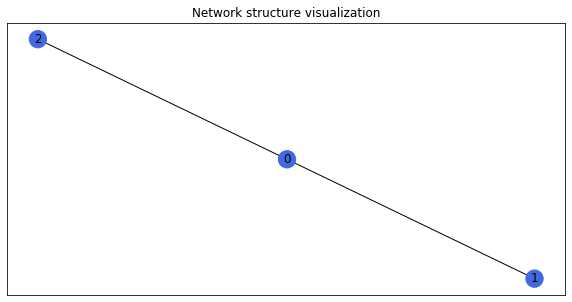

In [5]:
import networkx as nx

# Create craph structure
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2)])
l = nx.convert.to_dict_of_lists(G)
print(f'1. Graph edges: {l}')

alpha_payoff = 0.5
beta_payoff = 0.6
cons_threshold = 0.9
nr_trials = 10

# Create epostemic network
g = StaticEpistemicNetwork(l, alpha_payoff, beta_payoff, cons_threshold, nr_trials)
print('2. Agents details')
g.print_agents()
print(f'3. Consensus check: {g.is_consensus()}')
plot_network(g, 'Network structure visualization')

### Dynamic Network

Step 1:
  1. Graph edges: {0: [1, 2], 1: [0], 2: [0, 3], 3: [2]}
  2. Agents details
 -> Agent 0, cred: 0.03, trials_nr: 0, succ_nr: 0, neighbours: [1, 2]
 -> Agent 1, cred: 0.53, trials_nr: 0, succ_nr: 0, neighbours: [0]
 -> Agent 2, cred: 0.15, trials_nr: 0, succ_nr: 0, neighbours: [0, 3]
 -> Agent 3, cred: 0.25, trials_nr: 0, succ_nr: 0, neighbours: [2]
  3. Consensus check: False
  4. State: Incorrect Disagreement
  5. Mean credence: 0.2419064374660939
  6. Action voters: (3, 1)


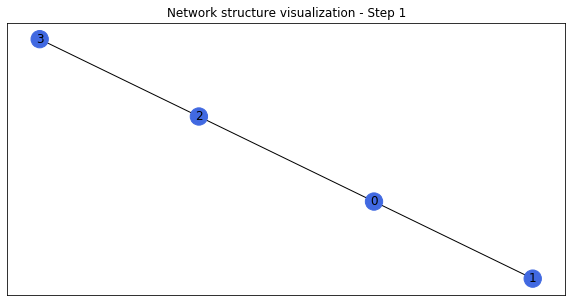

Step 2:
  1. Graph edges: {0: [1, 2], 1: [0, 2], 2: [0, 3, 1], 3: [2]}
  2. Agents details
 -> Agent 0, cred: 0.03, trials_nr: 0, succ_nr: 0, neighbours: [1, 2]
 -> Agent 1, cred: 0.53, trials_nr: 0, succ_nr: 0, neighbours: [0, 2]
 -> Agent 2, cred: 0.15, trials_nr: 0, succ_nr: 0, neighbours: [0, 1, 3]
 -> Agent 3, cred: 0.25, trials_nr: 0, succ_nr: 0, neighbours: [2]
  3. Consensus check: False
  4. State: Incorrect Disagreement
  5. Mean credence: 0.2419064374660939
  6. Action voters: (3, 1)


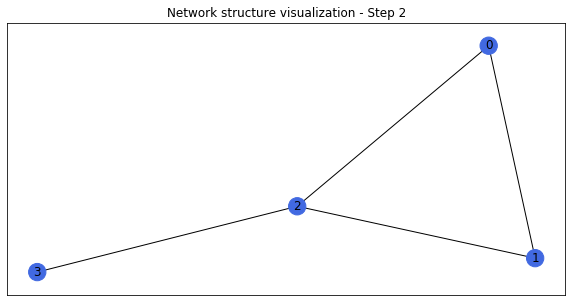

Step 3:
  1. Graph edges: {0: [1, 2, 3], 1: [0, 2], 2: [0, 3, 1], 3: [2, 0]}
  2. Agents details
 -> Agent 0, cred: 0.03, trials_nr: 0, succ_nr: 0, neighbours: [1, 2, 3]
 -> Agent 1, cred: 0.53, trials_nr: 0, succ_nr: 0, neighbours: [0, 2]
 -> Agent 2, cred: 0.15, trials_nr: 0, succ_nr: 0, neighbours: [0, 1, 3]
 -> Agent 3, cred: 0.25, trials_nr: 0, succ_nr: 0, neighbours: [0, 2]
  3. Consensus check: False
  4. State: Incorrect Disagreement
  5. Mean credence: 0.2419064374660939
  6. Action voters: (3, 1)


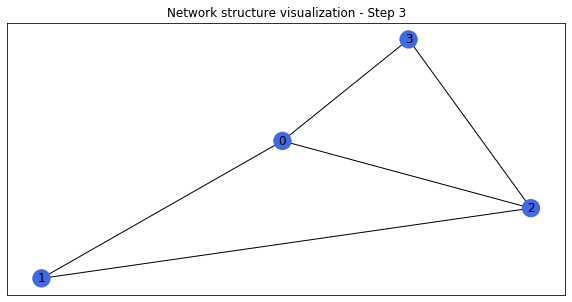

In [6]:
import networkx as nx

# Create craph structure
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (2, 3)])
l1 = nx.convert.to_dict_of_lists(G)

G.add_edges_from([(1, 2)])
l2 = nx.convert.to_dict_of_lists(G)

G.add_edges_from([(0, 3)])
l3 = nx.convert.to_dict_of_lists(G)

# Create epostemic network
alpha_payoff = 0.5
beta_payoff = 0.6
cons_threshold = 0.9
nr_trials = 10

g = DynamicEpistemicNetwork(l1, alpha_payoff, beta_payoff, cons_threshold, nr_trials)
print('Step 1:')
print(f'  1. Graph edges: {l1}')
print('  2. Agents details')
g.print_agents()
print(f'  3. Consensus check: {g.is_consensus()}')
print(f'  4. State: {g.get_state()}')
print(f'  5. Mean credence: {g.get_mean_credence()}')
print(f'  6. Action voters: {g.get_actions_voters_nr()}')
plot_network(g, 'Network structure visualization - Step 1')

g.update_structure(l2)
print('Step 2:')
print(f'  1. Graph edges: {l2}')
print('  2. Agents details')
g.print_agents()
print(f'  3. Consensus check: {g.is_consensus()}')
print(f'  4. State: {g.get_state()}')
print(f'  5. Mean credence: {g.get_mean_credence()}')
print(f'  6. Action voters: {g.get_actions_voters_nr()}')
plot_network(g, 'Network structure visualization - Step 2')

g.update_structure(l3)
print('Step 3:')
print(f'  1. Graph edges: {l3}')
print('  2. Agents details')
g.print_agents()
print(f'  3. Consensus check: {g.is_consensus()}')
print(f'  4. State: {g.get_state()}')
print(f'  5. Mean credence: {g.get_mean_credence()}')
print(f'  6. Action voters: {g.get_actions_voters_nr()}')
plot_network(g, 'Network structure visualization - Step 3')

In [21]:
g.get_status()

[('Correct Disagreement',
  1,
  3,
  0.7243852930869453,
  1,
  0,
  'Correct Disagreement',
  1,
  3,
  0.7243852930869453)]

#### Network updating experiments

In [ ]:
structure = {
    0: [1, 2],
    1: [],
    3: [4],
    4: [5, 1]
}

In [84]:
structure = step_to_adjacency_list_2[2]
g = nx.Graph(structure)
undirected_structure = nx.convert.to_dict_of_lists(g)
pp.pprint(undirected_structure)



{13116: [62555, 94795, 60830],
 20905: [69669],
 22931: [60830],
 30952: [60830],
 60830: [75178, 30952, 13116, 97655, 95135, 22931],
 62555: [13116],
 69669: [20905, 97655],
 75178: [60830],
 94795: [13116],
 95135: [60830],
 97655: [60830, 69669]}


### Simulation for static network

In [22]:
# Create epistemic network
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 3), (3, 4), (2, 4), (5, 6)])
l = nx.convert.to_dict_of_lists(G)

alpha_payoff = 0.5
beta_payoff = 0.6
cons_threshold = 0.9
nr_trials = 10

g = StaticEpistemicNetwork(l, alpha_payoff, beta_payoff, cons_threshold, nr_trials)

# Run simulation
s = Simulation(g, 10)
sim_res = s.run(verbose=True)

Agents details
 -> Agent 0, cred: 0.38, trials_nr: 0, succ_nr: 0, neighbours: [1, 2]
 -> Agent 1, cred: 0.57, trials_nr: 0, succ_nr: 0, neighbours: [0, 3]
 -> Agent 2, cred: 0.04, trials_nr: 0, succ_nr: 0, neighbours: [0, 4]
 -> Agent 3, cred: 1.00, trials_nr: 10, succ_nr: 8, neighbours: [1, 4]
 -> Agent 4, cred: 0.99, trials_nr: 10, succ_nr: 8, neighbours: [2, 3]
 -> Agent 5, cred: 0.92, trials_nr: 10, succ_nr: 2, neighbours: [6]
 -> Agent 6, cred: 0.37, trials_nr: 10, succ_nr: 7, neighbours: [5]
Consensus check: False
State: Correct Disagreement
Mean credence: 0.6106353001560897
Action voters: (3, 4)

Agents details
 -> Agent 0, cred: 0.76, trials_nr: 0, succ_nr: 0, neighbours: [1, 2]
 -> Agent 1, cred: 0.97, trials_nr: 10, succ_nr: 7, neighbours: [0, 3]
 -> Agent 2, cred: 0.04, trials_nr: 0, succ_nr: 0, neighbours: [0, 4]
 -> Agent 3, cred: 1.00, trials_nr: 10, succ_nr: 7, neighbours: [1, 4]
 -> Agent 4, cred: 1.00, trials_nr: 10, succ_nr: 5, neighbours: [2, 3]
 -> Agent 5, cred: 0.

In [27]:
s.network.get_status()

[('Correct Disagreement',
  2,
  5,
  0.7789954351413374,
  2,
  0,
  'Correct Consensus',
  0,
  5,
  0.9999999999963837),
 ('Correct Disagreement',
  2,
  5,
  0.7789954351413374,
  2,
  1,
  'Incorrect Consensus',
  2,
  0,
  0.2264840230037216)]

### Zollman effect

In [41]:
# TODO: run

## Cogsnet

### Loading data

In [23]:
import pickle

with open('data/processed/step_to_adjacency_list.pickle', 'rb') as handle:
    step_to_adjacency_list = pickle.load(handle)

In [24]:
from collections import Counter

lens = [len(val) for val in step_to_adjacency_list[160].values()]
print(Counter(lens))

Counter({0: 89, 1: 49, 2: 31, 4: 13, 3: 12, 5: 4, 6: 1})


### Removing empty records

In [25]:
step_to_adjacency_list_2 = {}
for k in step_to_adjacency_list.keys():
    step_to_adjacency_list_2[k] = {int(key): [int(v) for v in val] for key, val in step_to_adjacency_list[k].items() if val}

## Epistemic network based on Cogsnet structure

In [180]:
from src.epinet.agent import Agent
from src.epinet.models import StaticEpistemicNetwork, DynamicEpistemicNetwork
from src.epinet.simulation import Simulation, CogsnetSimulation
from src.visualizations.visualizations import plot_network
from src.utils import logger

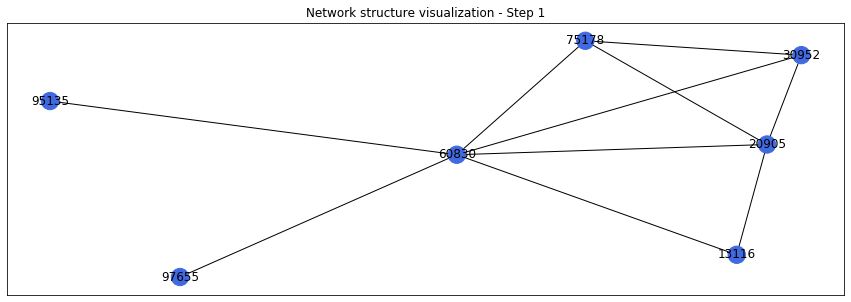

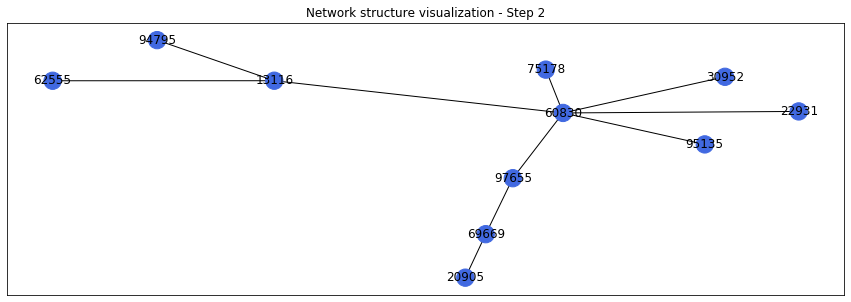

 -> Agent 20905, cred: 0.71, trials_nr: 0, succ_nr: 0, neighbours: [69669]
 -> Agent 30952, cred: 0.10, trials_nr: 0, succ_nr: 0, neighbours: [60830]
 -> Agent 60830, cred: 0.99, trials_nr: 0, succ_nr: 0, neighbours: [75178, 30952, 13116, 97655, 95135, 22931]
 -> Agent 75178, cred: 0.22, trials_nr: 0, succ_nr: 0, neighbours: [60830]
 -> Agent 13116, cred: 0.64, trials_nr: 0, succ_nr: 0, neighbours: [62555, 94795, 60830]
 -> Agent 97655, cred: 0.51, trials_nr: 0, succ_nr: 0, neighbours: [60830, 69669]
 -> Agent 95135, cred: 0.78, trials_nr: 0, succ_nr: 0, neighbours: [60830]
 -> Agent 62555, cred: 0.84, trials_nr: 0, succ_nr: 0, neighbours: [13116]
 -> Agent 94795, cred: 0.53, trials_nr: 0, succ_nr: 0, neighbours: [13116]
 -> Agent 22931, cred: 0.47, trials_nr: 0, succ_nr: 0, neighbours: [60830]
 -> Agent 69669, cred: 0.26, trials_nr: 0, succ_nr: 0, neighbours: [20905, 97655]


In [29]:
alpha_payoff = 0.5
beta_payoff = 0.6
cons_threshold = 0.9
nr_trials = 10

g = DynamicEpistemicNetwork(step_to_adjacency_list_2[1], alpha_payoff, beta_payoff, cons_threshold, nr_trials)
plot_network(g, 'Network structure visualization - Step 1', (15, 5))

g.update_structure(step_to_adjacency_list_2[2])
plot_network(g, 'Network structure visualization - Step 2', (15, 5))

g.print_agents()

In [27]:
import pprint
pp = pprint.PrettyPrinter(width=120, compact=True)

## Cogsnets visualization

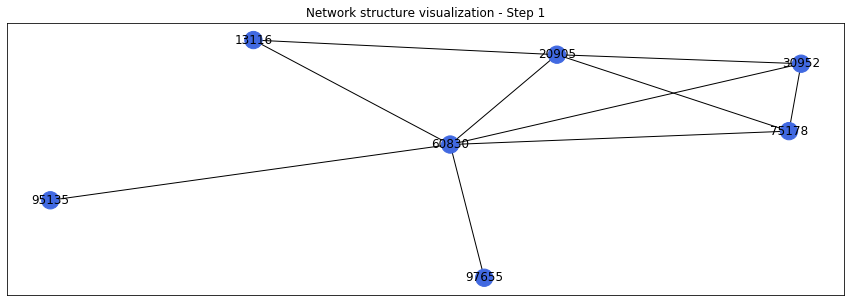

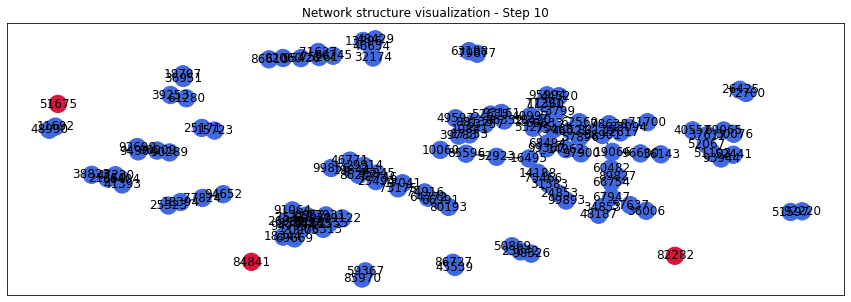

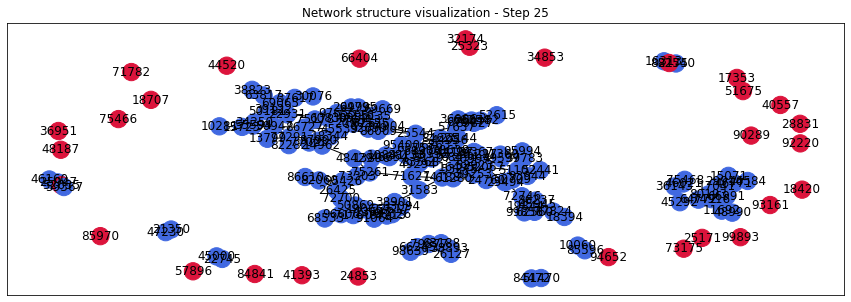

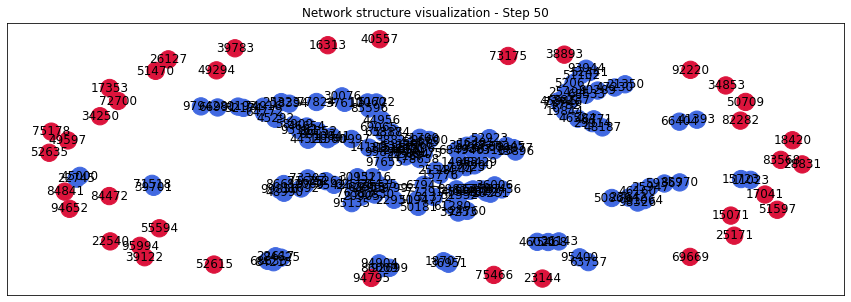

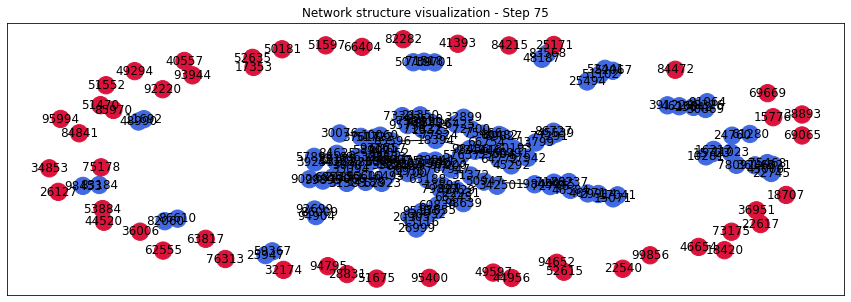

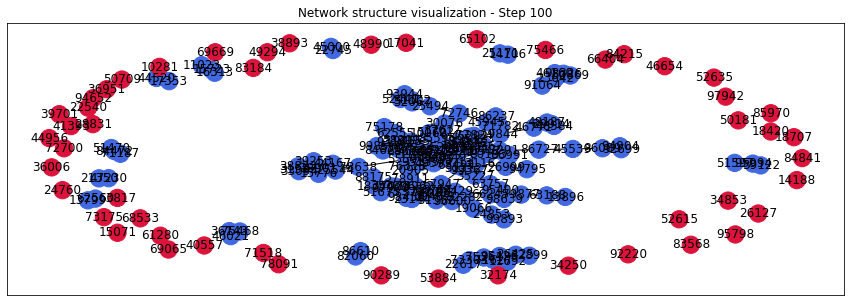

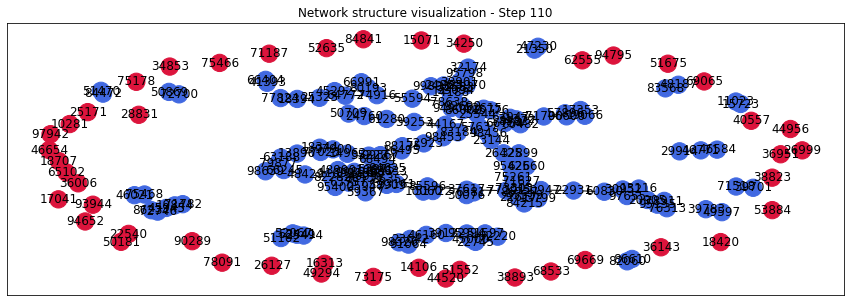

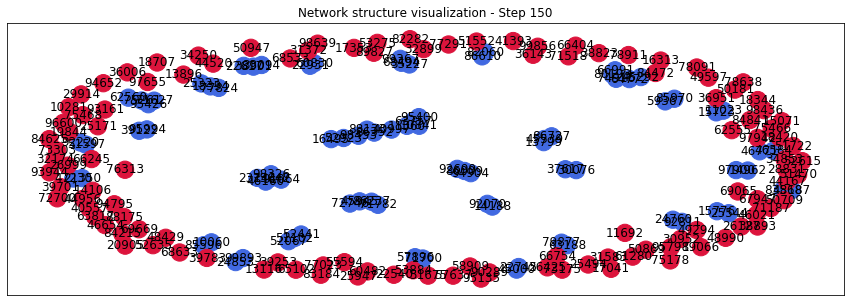

In [31]:
# Create epostemic network
alpha_payoff = 0.5
beta_payoff = 0.6
cons_threshold = 0.9
nr_trials = 10

g = DynamicEpistemicNetwork(step_to_adjacency_list_2[1], alpha_payoff, beta_payoff, cons_threshold, nr_trials)
plot_network(g, 'Network structure visualization - Step 1', (15, 5))
g.update_structure(step_to_adjacency_list_2[10])
plot_network(g, 'Network structure visualization - Step 10', (15, 5))
g.update_structure(step_to_adjacency_list_2[25])
plot_network(g, 'Network structure visualization - Step 25', (15, 5))
g.update_structure(step_to_adjacency_list_2[50])
plot_network(g, 'Network structure visualization - Step 50', (15, 5))
g.update_structure(step_to_adjacency_list_2[75])
plot_network(g, 'Network structure visualization - Step 75', (15, 5))
g.update_structure(step_to_adjacency_list_2[100])
plot_network(g, 'Network structure visualization - Step 100', (15, 5))
g.update_structure(step_to_adjacency_list_2[110])
plot_network(g, 'Network structure visualization - Step 110', (15, 5))
g.update_structure(step_to_adjacency_list_2[150])
plot_network(g, 'Network structure visualization - Step 150', (15, 5))

## Simulation on Cogsnet structures

In [32]:
# Init structures
alpha_payoff = 0.5
beta_payoff = 0.55
cons_threshold = 0.99
nr_trials = 10

base_network = DynamicEpistemicNetwork(step_to_adjacency_list_2[100], alpha_payoff, beta_payoff, cons_threshold, nr_trials)
next_structures = {k: step_to_adjacency_list_2[k] for k in range(101, 120)}

# Run simulation
s = CogsnetSimulation(network=base_network, nr_iterations=10, cogsnets=next_structures)
sim_res = s.run()
pp.pprint(sim_res)

({101: {'big_cc_av': 33,
        'big_cc_bv': 75,
        'big_cc_cred': 0.7435980161264609,
        'big_cc_state': 'Correct Disagreement',
        'full_net_av': 46,
        'full_net_bv': 99,
        'full_net_cred': 0.7409312337936259,
        'full_net_state': 'Correct Disagreement'},
  102: {'big_cc_av': 20,
        'big_cc_bv': 96,
        'big_cc_cred': 0.8550999849475394,
        'big_cc_state': 'Correct Disagreement',
        'full_net_av': 31,
        'full_net_bv': 114,
        'full_net_cred': 0.8273925137559209,
        'full_net_state': 'Correct Disagreement'},
  103: {'big_cc_av': 8,
        'big_cc_bv': 97,
        'big_cc_cred': 0.9463843805020506,
        'big_cc_state': 'Correct Disagreement',
        'full_net_av': 21,
        'full_net_bv': 118,
        'full_net_cred': 0.8881837797118313,
        'full_net_state': 'Correct Disagreement'},
  104: {'big_cc_av': 1,
        'big_cc_bv': 102,
        'big_cc_cred': 0.9901604812078445,
        'big_cc_state': 'Correct 

In [90]:
s.network.get_mean_credence()

0.9903072845470818

In [91]:
s.network.get_actions_voters_nr()

(2, 150)

In [92]:
import numpy as np
np.mean([a.credence for a in s.network.id_to_agents.values() if len(a.neighbors) == 0])

0.8618111890076389

# Expermients

In [198]:
consensus_threshold = 0.99  # consensus_threshold_values = []
nr_simulations = 1000
alpha_payoff = 0.5

# Results Data Frame format
# cogsnets | consensus_threshold | alpha_payoff | beta_payoff | nr_trials | nr_iterations_per_step || step |
#   CORRECT_CONSENSUS | INCORRECT_CONSENSUS | CORRECT_DISAGREEMENT | INCORRECT_DISAGREEMENT | ALPHA_VOTERS |
#   BETA_VOTERS | MEAN_CREDENCE |
#   BCC_CORRECT_CONSENSUS | BCC_INCORRECT_CONSENSUS | BCC_CORRECT_DISAGREEMENT |
#   BCC_INCORRECT_DISAGREEMENT | BCC_ALPHA_VOTERS | BCC_BETA_VOTERS | BCC_MEAN_CREDENCE |
#   REST_CC_CORRECT_CONSENSUS | REST_CC_INCORRECT_CONSENSUS | REST_CC_CORRECT_DISAGREEMENT |
#   REST_CC_INCORRECT_DISAGREEMENT | REST_CC_ALPHA_VOTERS | REST_CC_BETA_VOTERS | REST_CC_MEAN_CREDENCE |
#

# Time Step Metrics:

def run_experiment_1(cogsnets, beta_payoff_values, nr_trials_values, nr_iterations_per_step_values):
    struct_min_key = int(min(cogsnets.keys()))
    base_structure = cogsnets[struct_min_key]
    next_structures = {i: c for i, c in cogsnets.items() if i != struct_min_key}

    results = []

    for beta_payoff in beta_payoff_values:
        #for consensus_threshold in consensus_threshold_values:
            for nr_trials in nr_trials_values:
                for nr_iterations_per_step in nr_iterations_per_step_values:
                    #print(f"Performing simulation for config: {beta_payoff}, {consensus_threshold}, {nr_trials}, {nr_iterations_per_step}")
                    sim_set_results = {
                        'state': [],
                        'av': [],
                        'bv': [],
                        'cred': [],
                        'cc_state': [],
                        'cc_av': [],
                        'cc_bv': [],
                        'cc_cred': [],
                        'cons_time': []
                    }
                    for s_nr in tqdm(range(nr_simulations)):
                        network = DynamicEpistemicNetwork(base_structure, alpha_payoff, beta_payoff, consensus_threshold, nr_trials)
                        simulation = CogsnetSimulation(network, nr_iterations_per_step, next_structures)
                        time_step_results, final_res, cons_time = simulation.run()
                        
                        sim_set_results['state'].append(final_res['full_net_state'])
                        sim_set_results['av'].append(final_res['full_net_av'])
                        sim_set_results['bv'].append(final_res['full_net_bv'])
                        sim_set_results['cred'].append(final_res['full_net_cred'])
                        sim_set_results['cc_state'].append(final_res['big_cc_state'])
                        sim_set_results['cc_av'].append(final_res['big_cc_av'])
                        sim_set_results['cc_bv'].append(final_res['big_cc_bv'])
                        sim_set_results['cc_cred'].append(final_res['big_cc_cred'])
                        sim_set_results['cons_time'].append(cons_time)
                    # calc res row based on the aggregated sim results
                    
                    state_cc = len([s for s in sim_set_results['state'] if s == 'Correct Consensus'])
                    state_ic = len([s for s in sim_set_results['state'] if s == 'Incorrect Consensus'])
                    state_cd = len([s for s in sim_set_results['state'] if s == 'Correct Disagreement'])
                    state_id = len([s for s in sim_set_results['state'] if s == 'Incorrect Disagreement'])
                    
                    cc_state_cc = len([s for s in sim_set_results['cc_state'] if s == 'Correct Consensus'])
                    cc_state_ic = len([s for s in sim_set_results['cc_state'] if s == 'Incorrect Consensus'])
                    cc_state_cd = len([s for s in sim_set_results['cc_state'] if s == 'Correct Disagreement'])
                    cc_state_id = len([s for s in sim_set_results['cc_state'] if s == 'Incorrect Disagreement'])
                    
                    res = {
                        'state_cc': state_cc,
                        'state_ic': state_ic,
                        'state_cd': state_cd,
                        'state_id': state_id,
                        'av': 100 * np.mean(sim_set_results['av']) / (np.mean(sim_set_results['av']) + np.mean(sim_set_results['bv'])),
                        'bv': 100 * np.mean(sim_set_results['bv']) / (np.mean(sim_set_results['av']) + np.mean(sim_set_results['bv'])),
                        'cred': np.mean(sim_set_results['cred']),
                        'cc_state_cc': cc_state_cc,
                        'cc_state_ic': cc_state_ic,
                        'cc_state_cd': cc_state_cd,
                        'cc_state_id': cc_state_id,
                        'cc_av': 100 * np.mean(sim_set_results['cc_av']) / (np.mean(sim_set_results['cc_av']) + np.mean(sim_set_results['cc_bv'])),
                        'cc_bv': 100 * np.mean(sim_set_results['cc_bv']) / (np.mean(sim_set_results['cc_av']) + np.mean(sim_set_results['cc_bv'])),
                        'cc_cred': np.mean(sim_set_results['cc_cred']),
                        'cons_time': np.mean([t for t in sim_set_results['cons_time'] if t])
                    }
                    
                    pp.pprint(res)
                    results.append(res)
    return results

In [199]:
cogsnets = {k: step_to_adjacency_list_2[k] for k in range(10, 110)}
beta_payoff_values = [0.501, 0.51, 0.55, 0.6, 0.7, 0.8]  # [0.501, 0.51, 0.55, 0.6, 0.7, 0.8]
nr_trials_values = [50] # [1, 5, 10, 50, 100, 1000]
nr_iterations_per_step_values = [10]  # [1, 3, 5, 10, 50, 100]

results1 = run_experiment_1(cogsnets, beta_payoff_values, nr_trials_values , nr_iterations_per_step_values)

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

Performing simulation for config: 0.501, 0.99, 50, 10


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [22:59<00:00,  1.38s/it]
C:\Users\Damian\Anaconda3\envs\epinet\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Damian\Anaconda3\envs\epinet\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

{'av': 47.41818181818183,
 'bv': 52.58181818181817,
 'cc_av': 45.97722772277228,
 'cc_bv': 54.02277227722772,
 'cc_cred': 0.5755024717711317,
 'cc_state_cc': 0,
 'cc_state_cd': 732,
 'cc_state_ic': 0,
 'cc_state_id': 268,
 'cons_time': nan,
 'cred': 0.5681237571044541,
 'state_cc': 0,
 'state_cd': 682,
 'state_ic': 0,
 'state_id': 318}
Performing simulation for config: 0.51, 0.99, 50, 10


  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

{'av': 0.4496503496503496,
 'bv': 99.55034965034966,
 'cc_av': 0.12079207920792079,
 'cc_bv': 99.87920792079207,
 'cc_cred': 0.9988721631847405,
 'cc_state_cc': 833,
 'cc_state_cd': 167,
 'cc_state_ic': 0,
 'cc_state_id': 0,
 'cons_time': 96.77790304396844,
 'cred': 0.996409634551261,
 'state_cc': 598,
 'state_cd': 402,
 'state_ic': 0,
 'state_id': 0}
Performing simulation for config: 0.55, 0.99, 50, 10


  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

{'av': 0.0,
 'bv': 100.0,
 'cc_av': 0.0,
 'cc_bv': 100.0,
 'cc_cred': 1.0,
 'cc_state_cc': 1000,
 'cc_state_cd': 0,
 'cc_state_ic': 0,
 'cc_state_id': 0,
 'cons_time': 98.0,
 'cred': 1.0,
 'state_cc': 1000,
 'state_cd': 0,
 'state_ic': 0,
 'state_id': 0}
Performing simulation for config: 0.6, 0.99, 50, 10


  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

{'av': 0.0,
 'bv': 100.0,
 'cc_av': 0.0,
 'cc_bv': 100.0,
 'cc_cred': 1.0,
 'cc_state_cc': 1000,
 'cc_state_cd': 0,
 'cc_state_ic': 0,
 'cc_state_id': 0,
 'cons_time': 98.0,
 'cred': 1.0,
 'state_cc': 1000,
 'state_cd': 0,
 'state_ic': 0,
 'state_id': 0}
Performing simulation for config: 0.7, 0.99, 50, 10


  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

{'av': 0.0,
 'bv': 100.0,
 'cc_av': 0.0,
 'cc_bv': 100.0,
 'cc_cred': 1.0,
 'cc_state_cc': 1000,
 'cc_state_cd': 0,
 'cc_state_ic': 0,
 'cc_state_id': 0,
 'cons_time': 98.0,
 'cred': 1.0,
 'state_cc': 1000,
 'state_cd': 0,
 'state_ic': 0,
 'state_id': 0}
Performing simulation for config: 0.8, 0.99, 50, 10


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [28:57<00:00,  1.74s/it]

{'av': 0.0,
 'bv': 100.0,
 'cc_av': 0.0,
 'cc_bv': 100.0,
 'cc_cred': 1.0,
 'cc_state_cc': 1000,
 'cc_state_cd': 0,
 'cc_state_ic': 0,
 'cc_state_id': 0,
 'cons_time': 98.0,
 'cred': 1.0,
 'state_cc': 1000,
 'state_cd': 0,
 'state_ic': 0,
 'state_id': 0}


In [200]:
cogsnets = {k: step_to_adjacency_list_2[k] for k in range(10, 110)}
beta_payoff_values = [0.55]  # [0.501, 0.51, 0.55, 0.6, 0.7, 0.8]
nr_trials_values = [50] # [1, 5, 10, 50, 100, 1000]
nr_iterations_per_step_values = [1, 3, 5, 10, 50, 100]  # [1, 3, 5, 10, 50, 100]

results2 = run_experiment_1(cogsnets, beta_payoff_values, nr_trials_values , nr_iterations_per_step_values)

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

Performing simulation for config: 0.55, 0.99, 50, 1


  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

{'av': 0.05314685314685314,
 'bv': 99.94685314685316,
 'cc_av': 0.0019801980198019802,
 'cc_bv': 99.9980198019802,
 'cc_cred': 0.999976951812132,
 'cc_state_cc': 995,
 'cc_state_cd': 5,
 'cc_state_ic': 0,
 'cc_state_id': 0,
 'cons_time': 97.916,
 'cred': 0.9995804580888981,
 'state_cc': 960,
 'state_cd': 40,
 'state_ic': 0,
 'state_id': 0}
Performing simulation for config: 0.55, 0.99, 50, 3


  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

{'av': 0.0,
 'bv': 100.0,
 'cc_av': 0.0,
 'cc_bv': 100.0,
 'cc_cred': 1.0,
 'cc_state_cc': 1000,
 'cc_state_cd': 0,
 'cc_state_ic': 0,
 'cc_state_id': 0,
 'cons_time': 98.0,
 'cred': 1.0,
 'state_cc': 1000,
 'state_cd': 0,
 'state_ic': 0,
 'state_id': 0}
Performing simulation for config: 0.55, 0.99, 50, 5


  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

{'av': 0.0,
 'bv': 100.0,
 'cc_av': 0.0,
 'cc_bv': 100.0,
 'cc_cred': 1.0,
 'cc_state_cc': 1000,
 'cc_state_cd': 0,
 'cc_state_ic': 0,
 'cc_state_id': 0,
 'cons_time': 98.0,
 'cred': 1.0,
 'state_cc': 1000,
 'state_cd': 0,
 'state_ic': 0,
 'state_id': 0}
Performing simulation for config: 0.55, 0.99, 50, 10


  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

{'av': 0.0,
 'bv': 100.0,
 'cc_av': 0.0,
 'cc_bv': 100.0,
 'cc_cred': 1.0,
 'cc_state_cc': 1000,
 'cc_state_cd': 0,
 'cc_state_ic': 0,
 'cc_state_id': 0,
 'cons_time': 98.0,
 'cred': 1.0,
 'state_cc': 1000,
 'state_cd': 0,
 'state_ic': 0,
 'state_id': 0}
Performing simulation for config: 0.55, 0.99, 50, 50


  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

{'av': 0.0,
 'bv': 100.0,
 'cc_av': 0.0,
 'cc_bv': 100.0,
 'cc_cred': 1.0,
 'cc_state_cc': 1000,
 'cc_state_cd': 0,
 'cc_state_ic': 0,
 'cc_state_id': 0,
 'cons_time': 98.0,
 'cred': 1.0,
 'state_cc': 1000,
 'state_cd': 0,
 'state_ic': 0,
 'state_id': 0}
Performing simulation for config: 0.55, 0.99, 50, 100


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [3:47:18<00:00, 13.64s/it]

{'av': 0.0,
 'bv': 100.0,
 'cc_av': 0.0,
 'cc_bv': 100.0,
 'cc_cred': 1.0,
 'cc_state_cc': 1000,
 'cc_state_cd': 0,
 'cc_state_ic': 0,
 'cc_state_id': 0,
 'cons_time': 98.0,
 'cred': 1.0,
 'state_cc': 1000,
 'state_cd': 0,
 'state_ic': 0,
 'state_id': 0}


## Save results

In [201]:
import pickle

with open('exp1.pickle', 'wb') as handle:
    pickle.dump(results1, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('exp2.pickle', 'wb') as handle:
    pickle.dump(results2, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Extend dicts and transform to data frames

In [202]:
beta_payoff_values = [0.501, 0.51, 0.55, 0.6, 0.7, 0.8]
for i, res in enumerate(results1):
    res['beta_payoff'] = beta_payoff_values[i]
    
print(results1)

[{'state_cc': 0, 'state_ic': 0, 'state_cd': 682, 'state_id': 318, 'av': 47.41818181818183, 'bv': 52.58181818181817, 'cred': 0.5681237571044541, 'cc_state_cc': 0, 'cc_state_ic': 0, 'cc_state_cd': 732, 'cc_state_id': 268, 'cc_av': 45.97722772277228, 'cc_bv': 54.02277227722772, 'cc_cred': 0.5755024717711317, 'cons_time': nan, 'beta_payoff': 0.501}, {'state_cc': 598, 'state_ic': 0, 'state_cd': 402, 'state_id': 0, 'av': 0.4496503496503496, 'bv': 99.55034965034966, 'cred': 0.996409634551261, 'cc_state_cc': 833, 'cc_state_ic': 0, 'cc_state_cd': 167, 'cc_state_id': 0, 'cc_av': 0.12079207920792079, 'cc_bv': 99.87920792079207, 'cc_cred': 0.9988721631847405, 'cons_time': 96.77790304396844, 'beta_payoff': 0.51}, {'state_cc': 1000, 'state_ic': 0, 'state_cd': 0, 'state_id': 0, 'av': 0.0, 'bv': 100.0, 'cred': 1.0, 'cc_state_cc': 1000, 'cc_state_ic': 0, 'cc_state_cd': 0, 'cc_state_id': 0, 'cc_av': 0.0, 'cc_bv': 100.0, 'cc_cred': 1.0, 'cons_time': 98.0, 'beta_payoff': 0.55}, {'state_cc': 1000, 'state_i

In [203]:
nr_iterations_per_step_values = [1, 3, 5, 10, 50, 100]
for i, res in enumerate(results2):
    res['iterations_per_step'] = nr_iterations_per_step_values[i]
    
print(results2)

[{'state_cc': 960, 'state_ic': 0, 'state_cd': 40, 'state_id': 0, 'av': 0.05314685314685314, 'bv': 99.94685314685316, 'cred': 0.9995804580888981, 'cc_state_cc': 995, 'cc_state_ic': 0, 'cc_state_cd': 5, 'cc_state_id': 0, 'cc_av': 0.0019801980198019802, 'cc_bv': 99.9980198019802, 'cc_cred': 0.999976951812132, 'cons_time': 97.916, 'iterations_per_step': 1}, {'state_cc': 1000, 'state_ic': 0, 'state_cd': 0, 'state_id': 0, 'av': 0.0, 'bv': 100.0, 'cred': 1.0, 'cc_state_cc': 1000, 'cc_state_ic': 0, 'cc_state_cd': 0, 'cc_state_id': 0, 'cc_av': 0.0, 'cc_bv': 100.0, 'cc_cred': 1.0, 'cons_time': 98.0, 'iterations_per_step': 3}, {'state_cc': 1000, 'state_ic': 0, 'state_cd': 0, 'state_id': 0, 'av': 0.0, 'bv': 100.0, 'cred': 1.0, 'cc_state_cc': 1000, 'cc_state_ic': 0, 'cc_state_cd': 0, 'cc_state_id': 0, 'cc_av': 0.0, 'cc_bv': 100.0, 'cc_cred': 1.0, 'cons_time': 98.0, 'iterations_per_step': 5}, {'state_cc': 1000, 'state_ic': 0, 'state_cd': 0, 'state_id': 0, 'av': 0.0, 'bv': 100.0, 'cred': 1.0, 'cc_sta

In [223]:
import pandas as pd

df1 = pd.DataFrame(results1)
df1.columns = [
    'CorrectConsensus', 'IncorrectConsensus', 'CorrectDisagreement', 'IncorrectDisagreement',
    'AlphaVoters', 'BetaVoters', 'Credence',
    'LargestCC_CorrectConsensus', 'LargestCCIncorrectConsensus', 'LargestCCCorrectDisagreement',
    'LargestCCIncorrectDisagreement', 'LargestCCAlphaVoters','LargestCCBetaVoters', 'LargestCCCredence',
    'TimeToConsensus', 'BetaPayoff'
]
df1.head()

,CorrectConsensus,IncorrectConsensus,CorrectDisagreement,IncorrectDisagreement,AlphaVoters,BetaVoters,Credence,LargestCC_CorrectConsensus,LargestCCIncorrectConsensus,LargestCCCorrectDisagreement,LargestCCIncorrectDisagreement,LargestCCAlphaVoters,LargestCCBetaVoters,LargestCCCredence,TimeToConsensus,BetaPayoff
0,0,0,682,318,47.418182,52.581818,0.568124,0,0,732,268,45.977228,54.022772,0.575502,NaN,0.501
1,598,0,402,0,0.449650,99.550350,0.996410,833,0,167,0,0.120792,99.879208,0.998872,96.777903,0.510
2,1000,0,0,0,0.000000,100.000000,1.000000,1000,0,0,0,0.000000,100.000000,1.000000,98.000000,0.550
3,1000,0,0,0,0.000000,100.000000,1.000000,1000,0,0,0,0.000000,100.000000,1.000000,98.000000,0.600
4,1000,0,0,0,0.000000,100.000000,1.000000,1000,0,0,0,0.000000,100.000000,1.000000,98.000000,0.700


In [224]:
df2 = pd.DataFrame(results2)
df2.columns = [
    'CorrectConsensus', 'IncorrectConsensus', 'CorrectDisagreement', 'IncorrectDisagreement',
    'AlphaVoters', 'BetaVoters', 'Credence',
    'LargestCC_CorrectConsensus', 'LargestCCIncorrectConsensus', 'LargestCCCorrectDisagreement',
    'LargestCCIncorrectDisagreement', 'LargestCCAlphaVoters', 'LargestCCBetaVoters', 'LargestCCCredence',
    'TimeToConsensus', 'IterationsPerTimeStep'
]
df2.head()

,CorrectConsensus,IncorrectConsensus,CorrectDisagreement,IncorrectDisagreement,AlphaVoters,BetaVoters,Credence,LargestCC_CorrectConsensus,LargestCCIncorrectConsensus,LargestCCCorrectDisagreement,LargestCCIncorrectDisagreement,LargestCCAlphaVoters,LargestCCBetaVoters,LargestCCCredence,TimeToConsensus,IterationsPerTimeStep
0,960,0,40,0,0.053147,99.946853,0.99958,995,0,5,0,0.00198,99.99802,0.999977,97.916,1
1,1000,0,0,0,0.000000,100.000000,1.00000,1000,0,0,0,0.00000,100.00000,1.000000,98.000,3
2,1000,0,0,0,0.000000,100.000000,1.00000,1000,0,0,0,0.00000,100.00000,1.000000,98.000,5
3,1000,0,0,0,0.000000,100.000000,1.00000,1000,0,0,0,0.00000,100.00000,1.000000,98.000,10
4,1000,0,0,0,0.000000,100.000000,1.00000,1000,0,0,0,0.00000,100.00000,1.000000,98.000,50


## Visualizations

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.style.use('ggplot')

In [246]:
%%html
<style>
table {float:left}
</style>

### Beta payoff impact

|Simulation properties| |
| :- | --- |
| cogsnets | days 10 - 110 |
| consensus_threshold | 0.99 |
| nr_simulations | 1000 |
| alpha_payoff | 0.5 |
| nr_trials | 50 |
| nr_iterations_per_step | 10 |
| beta_payoff | [0.501, 0.51, 0.55, 0.6, 0.7, 0.8] |

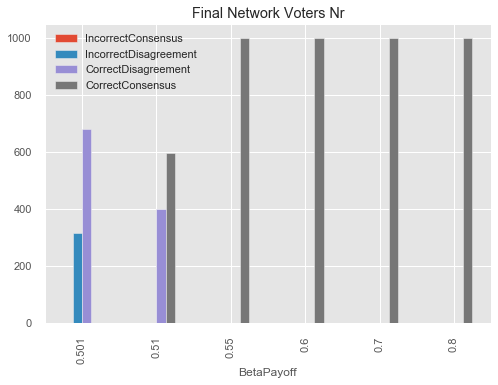

In [239]:
df1.plot(
    x="BetaPayoff",
    y=["IncorrectConsensus", "IncorrectDisagreement", "CorrectDisagreement", "CorrectConsensus"],
    kind="bar",
    title="Final Network Voters Nr"
)

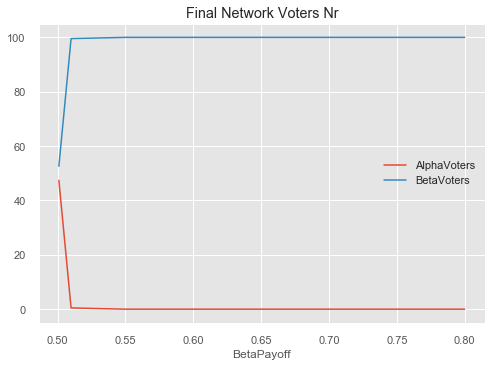

In [240]:
df1.plot(
    x="BetaPayoff",
    y=["AlphaVoters", "BetaVoters"],
    kind="line",
    title="Final Network Voters Nr"
)

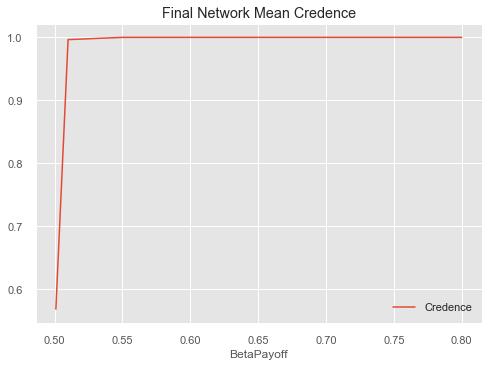

In [242]:
df1.plot(
    x="BetaPayoff",
    y=["Credence"],
    kind="line",
    title="Final Network Mean Credence"
)

### Iterations per step impact

|Simulation properties| |
| :- | --- |
| cogsnets | days 10 - 110 |
| consensus_threshold | 0.99 |
| nr_simulations | 1000 |
| alpha_payoff | 0.5 |
| nr_trials | 50 |
| nr_iterations_per_step | [1, 3, 5, 10, 50, 100] |
| beta_payoff | 0.55 |

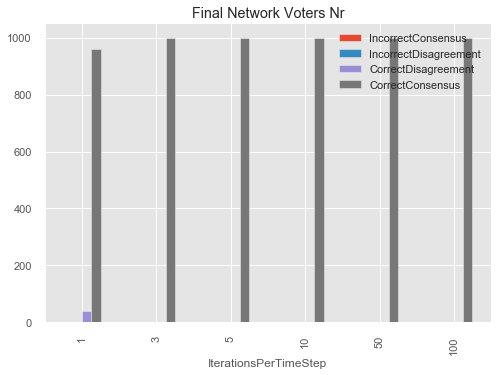

In [243]:
df2.plot(
    x="IterationsPerTimeStep",
    y=["IncorrectConsensus", "IncorrectDisagreement", "CorrectDisagreement", "CorrectConsensus"],
    kind="bar",
    title="Final Network Voters Nr"
)

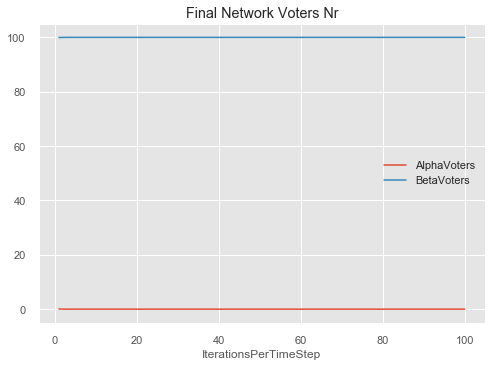

In [244]:
df2.plot(
    x="IterationsPerTimeStep",
    y=["AlphaVoters", "BetaVoters"],
    kind="line",
    title="Final Network Voters Nr"
)

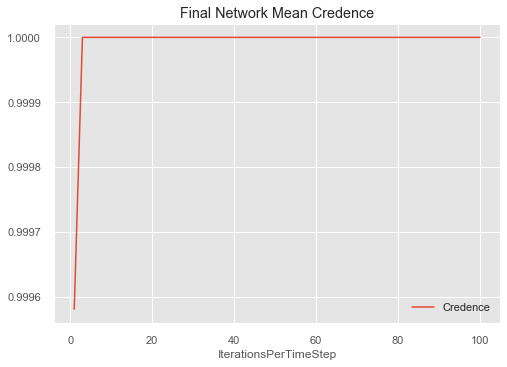

In [245]:
df2.plot(
    x="IterationsPerTimeStep",
    y=["Credence"],
    kind="line",
    title="Final Network Mean Credence"
)

## New version of experiments

In [35]:
from tqdm import tqdm

In [36]:
consensus_threshold = 0.999  # consensus_threshold_values = []
nr_simulations = 100
alpha_payoff = 0.5

# Results Data Frame format
# cogsnets | consensus_threshold | alpha_payoff | beta_payoff | nr_trials | nr_iterations_per_step || step |
#   CORRECT_CONSENSUS | INCORRECT_CONSENSUS | CORRECT_DISAGREEMENT | INCORRECT_DISAGREEMENT | ALPHA_VOTERS |
#   BETA_VOTERS | MEAN_CREDENCE |
#   BCC_CORRECT_CONSENSUS | BCC_INCORRECT_CONSENSUS | BCC_CORRECT_DISAGREEMENT |
#   BCC_INCORRECT_DISAGREEMENT | BCC_ALPHA_VOTERS | BCC_BETA_VOTERS | BCC_MEAN_CREDENCE |
#   REST_CC_CORRECT_CONSENSUS | REST_CC_INCORRECT_CONSENSUS | REST_CC_CORRECT_DISAGREEMENT |
#   REST_CC_INCORRECT_DISAGREEMENT | REST_CC_ALPHA_VOTERS | REST_CC_BETA_VOTERS | REST_CC_MEAN_CREDENCE |
# 

# Time Step Metrics:

def run_experiment_1(cogsnets, beta_payoff_values, nr_trials_values, nr_iterations_per_step_values):
    struct_min_key = int(min(cogsnets.keys()))
    base_structure = cogsnets[struct_min_key]
    next_structures = {i: c for i, c in cogsnets.items() if i != struct_min_key}

    results = []

    for beta_payoff in beta_payoff_values:
        #for consensus_threshold in consensus_threshold_values:
            for nr_trials in nr_trials_values:
                for nr_iterations_per_step in nr_iterations_per_step_values:
                    #print(f"Performing simulation for config: {beta_payoff}, {consensus_threshold}, {nr_trials}, {nr_iterations_per_step}")
                    sim_set_results = {
                        'state': [],
                        'av': [],
                        'bv': [],
                        'cred': [],
                        'cc_state': [],
                        'cc_av': [],
                        'cc_bv': [],
                        'cc_cred': [],
                        'cons_time': []
                    }
                    for s_nr in tqdm(range(nr_simulations)):
                        network = DynamicEpistemicNetwork(base_structure, alpha_payoff, beta_payoff, consensus_threshold, nr_trials)
                        simulation = CogsnetSimulation(network, nr_iterations_per_step, next_structures)
                        time_step_results, final_res, cons_time = simulation.run()
                        
                        av_prec = 100 * final_res['full_net_av'] / (final_res['full_net_av'] + final_res['full_net_bv'])
                        bv_prec = 100 * final_res['full_net_bv'] / (final_res['full_net_av'] + final_res['full_net_bv'])
                        
                        cc_av_prec = 100 * final_res['big_cc_av'] / (final_res['big_cc_av'] + final_res['big_cc_bv'])
                        cc_bv_prec = 100 * final_res['big_cc_bv'] / (final_res['big_cc_av'] + final_res['big_cc_bv'])
                        
                        sim_set_results['state'].append(final_res['full_net_state'])
                        sim_set_results['av'].append(final_res['full_net_av'])
                        sim_set_results['bv'].append(final_res['full_net_bv'])
                        sim_set_results['cred'].append(final_res['full_net_cred'])
                        sim_set_results['cc_state'].append(final_res['big_cc_state'])
                        sim_set_results['cc_av'].append(final_res['big_cc_av'])
                        sim_set_results['cc_bv'].append(final_res['big_cc_bv'])
                        sim_set_results['cc_cred'].append(final_res['big_cc_cred'])
                        sim_set_results['cons_time'].append(cons_time)
                        
                        res = {
                            'beta_payoff': beta_payoff,
                            'nr_trials': nr_trials,
                            'nr_iterations_per_step': nr_iterations_per_step,
                            'state': final_res['full_net_state'],
                            'av': av_prec,
                            'bv': bv_prec,
                            'cred': final_res['full_net_cred'],
                            'cc_state': final_res['big_cc_state'],
                            'cc_av': cc_av_prec,
                            'cc_bv': cc_bv_prec,
                            'cc_cred': final_res['big_cc_cred'],
                            'cons_time': cons_time
                        }
                        
                        results.append(res)
    df = pd.DataFrame(results)
    return results

In [ ]:
cogsnets = {k: step_to_adjacency_list_2[k] for k in range(10, 110)}
beta_payoff_values = [0.5005, 0.501, 0.505, 0.51, 0.55, 0.6]  # [0.501, 0.51, 0.55, 0.6, 0.7, 0.8]
nr_trials_values = [1, 5, 10, 50, 100] # [1, 5, 10, 50, 100, 1000]
nr_iterations_per_step_values = [5]  # [1, 3, 5, 10, 50, 100]

r1 = run_experiment_1(cogsnets, beta_payoff_values, nr_trials_values , nr_iterations_per_step_values)

 31%|█████████████████████████                                                        | 31/100 [00:28<01:03,  1.09it/s]

In [ ]:
df = pd.DataFrame(r1)
df.head()
df.to_csv("experiment_result.csv")

In [ ]:
cogsnets = {k: step_to_adjacency_list_2[k] for k in range(10, 110)}
beta_payoff_values = [0.5005, 0.501, 0.505, 0.51, 0.55, 0.6]  # [0.501, 0.51, 0.55, 0.6, 0.7, 0.8]
nr_trials_values = [10] # [1, 5, 10, 50, 100, 1000]
nr_iterations_per_step_values = [5]  # [1, 3, 5, 10, 50, 100]

r2 = run_experiment_1(cogsnets, beta_payoff_values, nr_trials_values , nr_iterations_per_step_values)

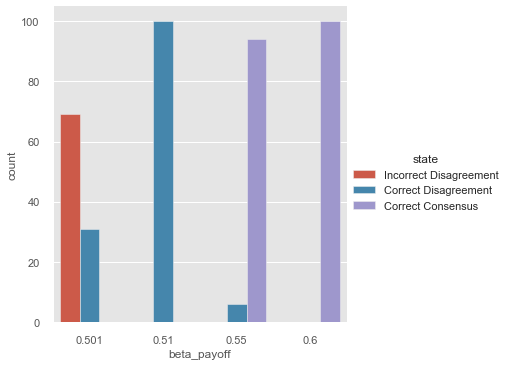

In [256]:
sns.catplot(x="beta_payoff", hue="state", kind="count", data=df)

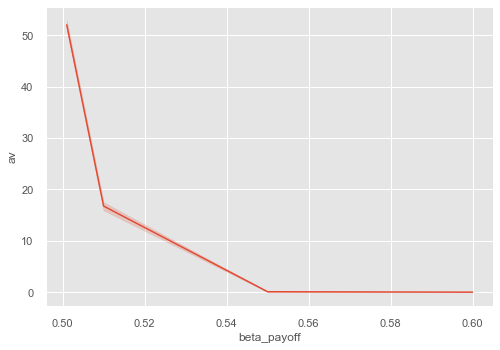

In [257]:
sns.lineplot(x="beta_payoff", y="av", data=df)

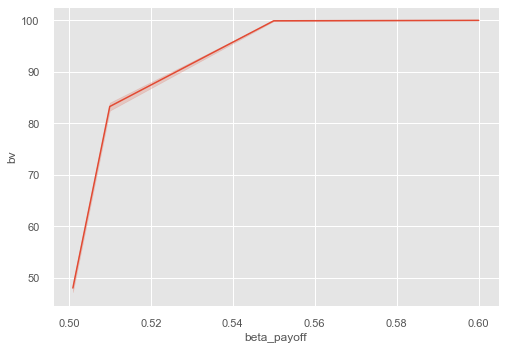

In [258]:
sns.lineplot(x="beta_payoff", y="bv", data=df)

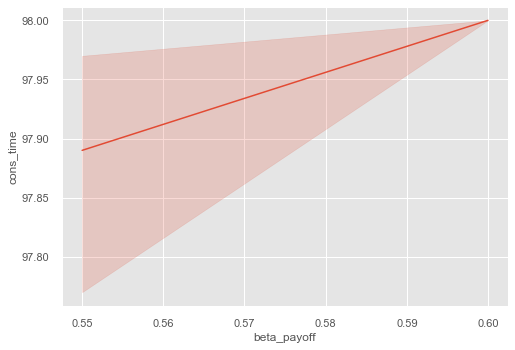

In [261]:
sns.lineplot(x="beta_payoff", y="cons_time", data=df)

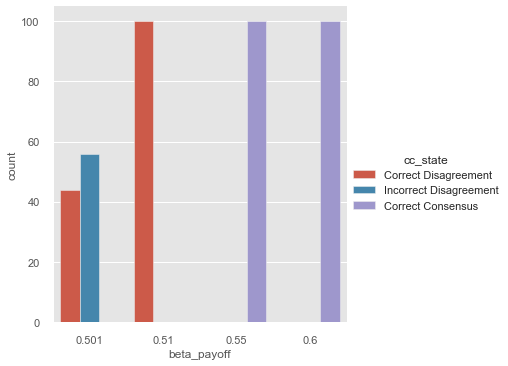

In [260]:
sns.catplot(x="beta_payoff", hue="cc_state", kind="count", data=df)

In [ ]:
def save_results(data):
    
    fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharey=True)
    fig.suptitle('Initial Pokemon - 1st Generation')

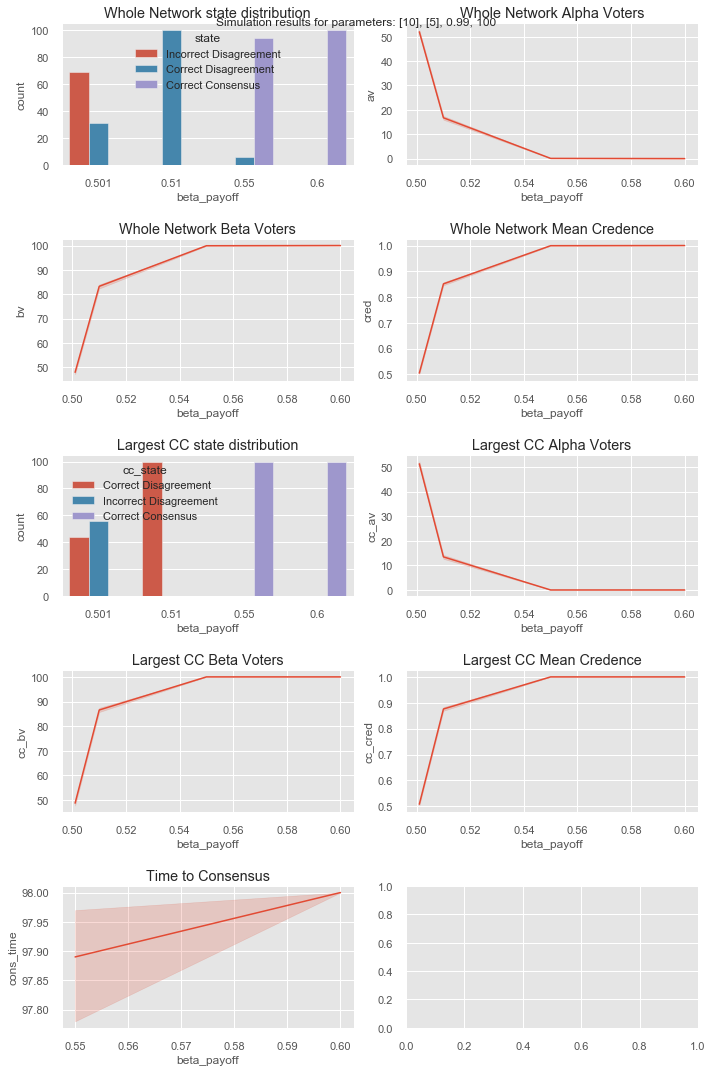

In [279]:
fig, axes = plt.subplots(5, 2, figsize=(10, 15), sharey=False)
fig.suptitle(f'Simulation results for parameters: {nr_trials_values}, {nr_iterations_per_step_values}, {consensus_threshold}, {nr_simulations}')

l = sns.countplot(ax=axes[0,0], x="beta_payoff", hue="state", data=df)
axes[0,0].set_title('Whole Network state distribution')
#l.legend(
#    #fontsize = 15,
#    bbox_to_anchor=(1.03, 1),
#    #title="Delivery Type",
#    #title_fontsize = 18,
#    shadow = True,
#    facecolor = 'white',
#    loc='upper center',
#    fancybox=True
#)

l = sns.lineplot(ax=axes[0,1], x="beta_payoff", y="av", data=df)
axes[0,1].set_title('Whole Network Alpha Voters')

sns.lineplot(ax=axes[1,0], x="beta_payoff", y="bv", data=df)
axes[1,0].set_title('Whole Network Beta Voters')

sns.lineplot(ax=axes[1,1], x="beta_payoff", y="cred", data=df)
axes[1,1].set_title('Whole Network Mean Credence')

sns.countplot(ax=axes[2,0], x="beta_payoff", hue="cc_state", data=df)
axes[2,0].set_title('Largest CC state distribution')

sns.lineplot(ax=axes[2,1], x="beta_payoff", y="cc_av", data=df)
axes[2,1].set_title('Largest CC Alpha Voters')

sns.lineplot(ax=axes[3,0], x="beta_payoff", y="cc_bv", data=df)
axes[3,0].set_title('Largest CC Beta Voters')

sns.lineplot(ax=axes[3,1], x="beta_payoff", y="cc_cred", data=df)
axes[3,1].set_title('Largest CC Mean Credence')

sns.lineplot(ax=axes[4,0], x="beta_payoff", y="cons_time", data=df)
axes[4,0].set_title('Time to Consensus')

fig.tight_layout(w_pad=1, h_pad=2)